<a href="https://colab.research.google.com/github/alvarodatagithub/dsrpt1/blob/main/5_PROYECTO_Alvaro_Marquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

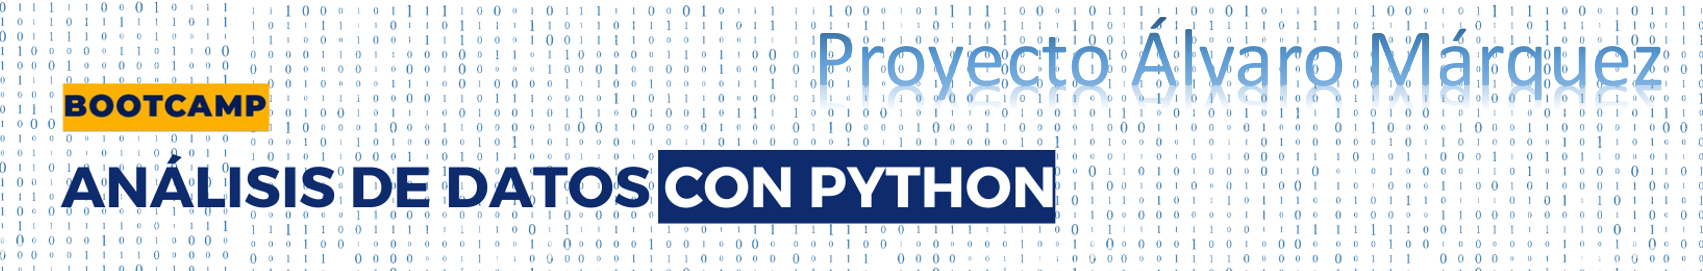

Autore: Alvaro Marquez

Tutor: Augusto Huerta

Equipo: 5


---

#Caso: Precio Móviles

---

Se estudiará el ramgo de precio y la influencia por la memoria RAM y capacidad de la Bateria.


## Acerca de la data



Valores a considrear en el analisis

•	ram - Memoria Ram en Mega Bytes

•	price_range: esta es la variable de destino con valor de 0 (costo bajo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

•	blue - Tiene bluetooth o no

•	dual_sim - Tiene soporte dual sim o no

•	four_g - Tiene 4G o no

•	touch_screen - Tiene pantalla táctil o no

•	wifi - Tiene wifi o no

•	n_cores -Número de núcleos de procesador


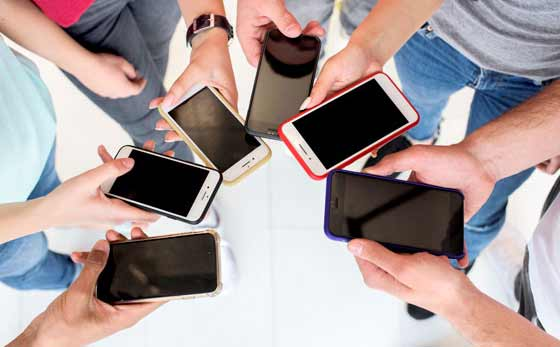

# Analisis Exploratorio

En primer lugar, importamos las librerias

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
sns.set_style('darkgrid')

In [ ]:
import seaborn as sns
from seaborn import kdeplot
tips = sns.load_dataset('tips')
sns.set(style='ticks') # interlineado
sns.set_style('darkgrid') # Malla Gris

Luego, importamos la data


In [12]:
df= pd.read_csv("train.csv")

Por medio de un codigo conectamos drive con colab para subir la data

In [5]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) 
print(df)


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

**Mostramos los primeros y ultimos registro de la data**

Primeros

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Últimos

In [10]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


Revisando si tenemos valores nulos

In [21]:
df.isnull().any()


Bateria            False
blue               False
clock_speed        False
Doble_sim          False
fc                 False
four_g             False
memoria interna    False
m_dep              False
mobile_wt          False
n_cores            False
pc                 False
px_height          False
px_width           False
ram                False
sc_h               False
sc_w               False
talk_time          False
three_g            False
touch_screen       False
wifi               False
price_range        False
dtype: bool

Sin datos duplicados

In [63]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

Realizamos un resumen de todo el data frame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Cambiamos los nombres de la Columna

In [16]:
df.rename(columns={'battery_power':'Bateria','dual_sim':'Doble_sim','int_memory':'memoria interna'},
               inplace=True)
df.columns

Index(['Bateria', 'blue', 'clock_speed', 'Doble_sim', 'fc', 'four_g',
       'memoria interna', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Verificamos el cambio de nombres y analizamos valores puntuales con describe

In [37]:
df.describe()

,Bateria,blue,clock_speed,Doble_sim,fc,four_g,memoria interna,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Graficos Simples



Analicemos caracteristicas claves en los telefonos moviles como memoria ram y capacidad de la bateria

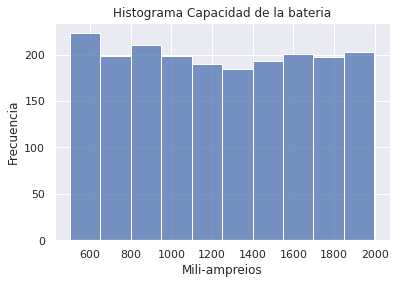

In [73]:
hist = sns.histplot(df['Bateria'], bins=10) #Para el histograma de la Capacidad Bateria
hist.set_title('Histograma Capacidad de la bateria')
plt.xlabel("Mili-ampreios")
plt.ylabel("Frecuencia")
plt.show()

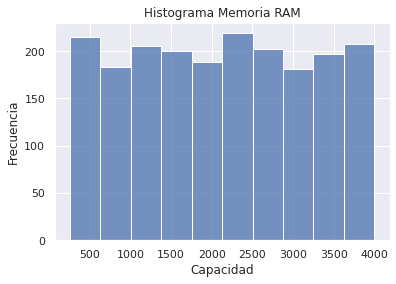

In [72]:
hist = sns.histplot(df['ram'], bins=10)
hist.set_title('Histograma Memoria RAM')
plt.xlabel("Capacidad")
plt.ylabel("Frecuencia")
plt.show()

---


Se observa en el Histograma que los datos estan bastante uniformes


---



Vamos a analizar el bateria con respecto al rango de precio

# Graficos Multivariables

Realizamos Mapa de calor para comprar las Variables de la DF

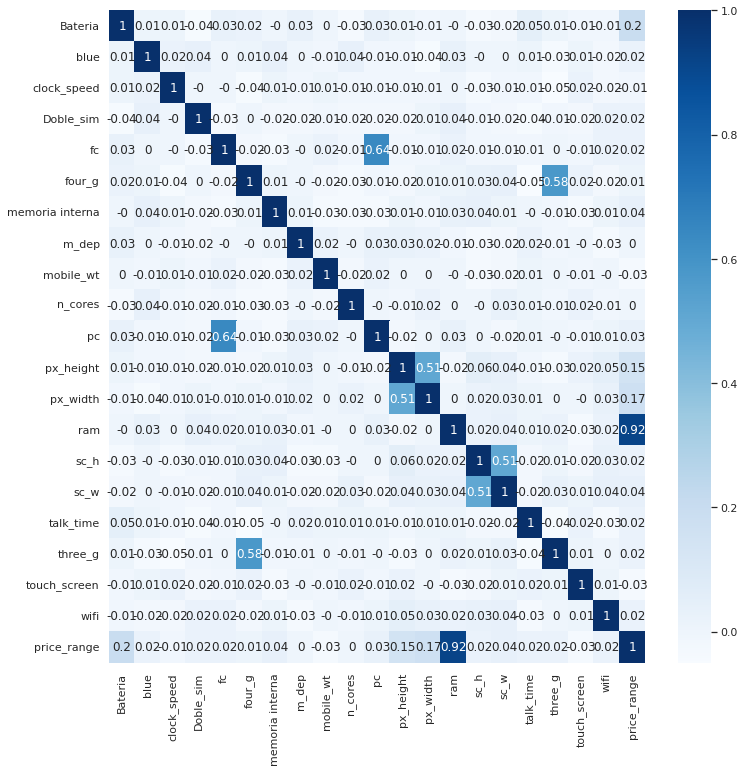

In [70]:
# definimos aca nuestra matriz de correlaciones
df_corr=df.corr().round(2)

# ploteamos el hearmap
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,annot=True,cmap='Blues')
plt.show()

Se aprecia un 92% en que a mayor ram mayor precio

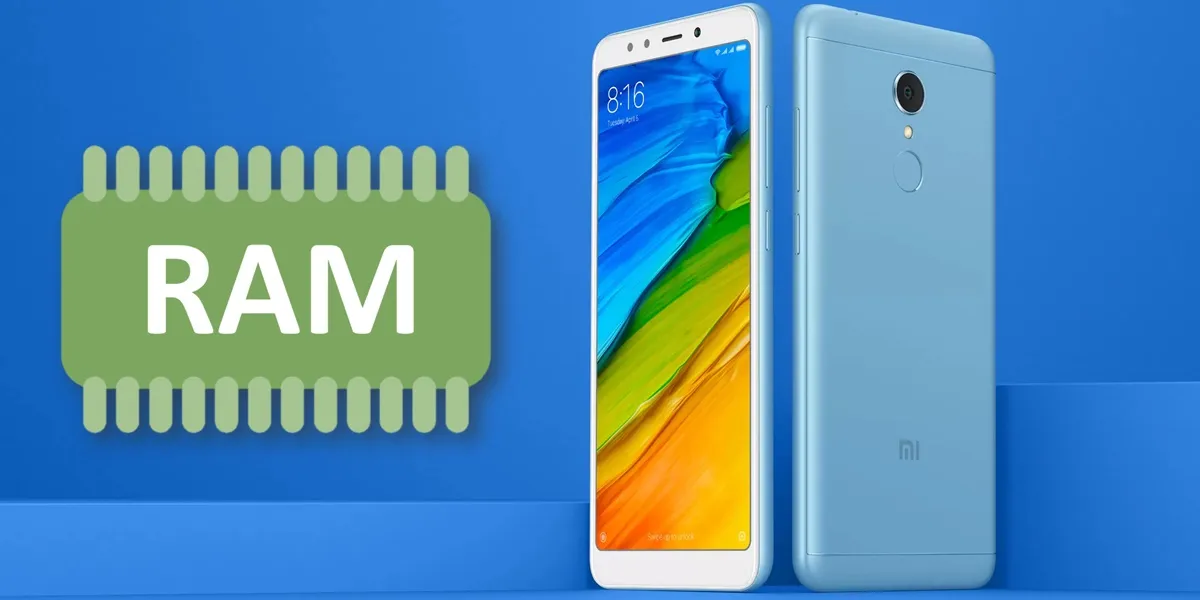

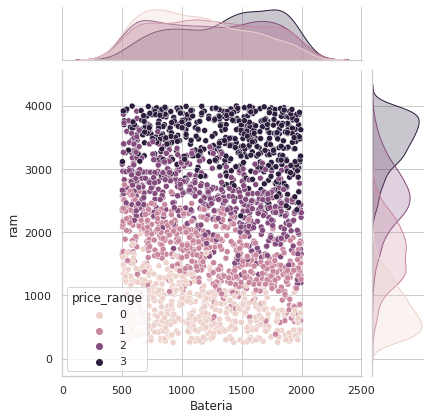

In [118]:
sns.jointplot(x='Bateria',y='ram',data=df,hue='price_range');

Se observa un rango de precio mas elevado (nivel 3= Costo muy alto) debido al aumento de memoria Ram, de similar forma la capacidad de la bateria se ve influenciada en menor proporción

# Analisis de Doble SIM

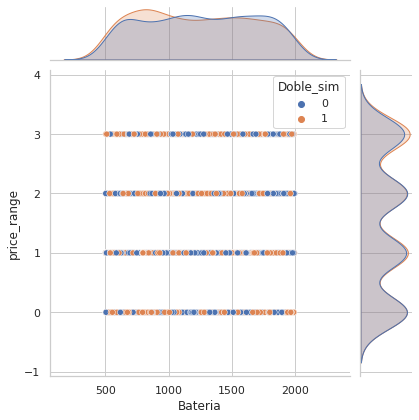

In [136]:
sns.jointplot(x='Bateria',y='price_range',data=df,hue='Doble_sim');

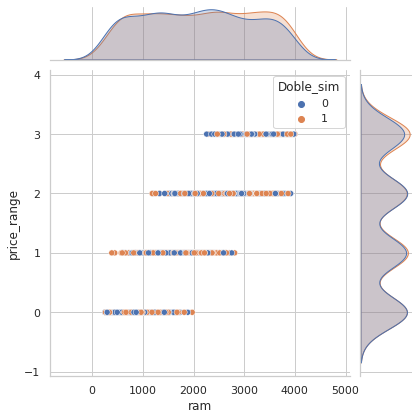

In [139]:
sns.jointplot(x='ram',y='price_range',data=df, hue='Doble_sim');

# Conclusión

Se concluye que el factor de la memoria RAM es clave en el aumento del rango de precio de los equipos, la bateria tiene menor proporcion de aumento

El hecho que los equipos sean doble SIM no es tan relevante segun la data para los ajustes del rango de precio del equipo
